### House Price Model Training

In [37]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.model_selection import GridSearchCV,train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, LassoCV
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import r2_score
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer, make_column_transformer
import warnings
warnings.filterwarnings('ignore')

In [38]:
df = pd.read_csv('Housing.csv')

In [39]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


#### Independent Feature and Dependent Feature

In [40]:
X = df.drop('price', axis=1) # independent variable 
y =df['price'] # dependent variable

### Train test split

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

### Data encoding 

In [42]:
ohe = OneHotEncoder()
ohe.fit(X[['mainroad', 'guestroom',
       'basement', 'hotwaterheating', 'airconditioning', 'prefarea',
       'furnishingstatus']])

OneHotEncoder()

### Pipelines

In [43]:
column_trans = make_column_transformer((OneHotEncoder(categories=ohe.categories_), ['mainroad', 'guestroom',
                                                                                    'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus']), 
                                       (MinMaxScaler(), ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']),remainder='passthrough')

In [44]:
lr = LinearRegression()
ridge = Ridge()
lasso = Lasso()
elasticnet = ElasticNet()
lassocv = LassoCV(cv=5)

In [45]:
pipe_lr = make_pipeline(column_trans, lr)
pipe_Rd= make_pipeline(column_trans, ridge)
pipe_LS = make_pipeline(column_trans, lasso)
pipe_LSCV = make_pipeline(column_trans, lassocv)
pipe_EN = make_pipeline(column_trans, elasticnet)

### Linear Regression - After Scalling

In [46]:
scores =[]
for i in range(1000):
    X_train, X_test,  y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=i)
    pipe_lr.fit(X_train, y_train)
    y_pred = pipe_lr.predict(X_test)
    scores.append(r2_score(y_test, y_pred))

In [47]:
np.argmax(scores)

497

In [48]:
scores[np.argmax(scores)]

0.8001613780083363

Mean absolute error 652330.2201834862
Accuracy 0.8001613780083363


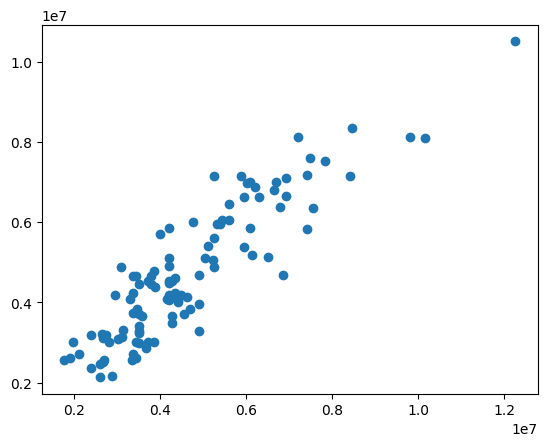

In [49]:
X_train, X_test,  y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=np.argmax(scores))

pipe_lr.fit(X_train, y_train)

y_pred = pipe_lr.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)

score = r2_score(y_test, y_pred)

print('Mean absolute error', mae)

print('Accuracy', score)

plt.scatter(y_test, y_pred)

### Cross Validation Lasso

In [50]:
scores =[]
for i in range(1000):
    X_train, X_test,  y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=i)
    pipe_LSCV.fit(X_train, y_train)
    y_pred = pipe_LSCV.predict(X_test)
    scores.append(r2_score(y_test, y_pred))

In [51]:
np.argmax(scores)

497

In [52]:
scores[np.argmax(scores)]

0.8042112005930278

Mean absolute error 647255.3091604419
Accuracy 0.8042112005930278


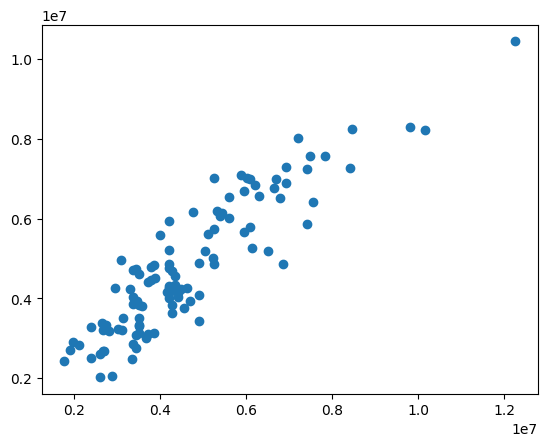

In [53]:
X_train, X_test,  y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=np.argmax(scores))

pipe_LSCV.fit(X_train, y_train)

y_pred = pipe_LSCV.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)

score = r2_score(y_test, y_pred)

print('Mean absolute error', mae)

print('Accuracy', score)

plt.scatter(y_test, y_pred)

## Ridge Regression

In [54]:
scores =[]
for i in range(1000):
    X_train, X_test,  y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=i)
    pipe_Rd.fit(X_train, y_train)
    y_pred = pipe_Rd.predict(X_test)
    scores.append(r2_score(y_test, y_pred))

In [55]:
np.argmax(scores)

497

In [56]:
scores[np.argmax(scores)]

0.8001328712356826

Mean absolute error 649731.401283427
Accuracy 0.8001328712356826


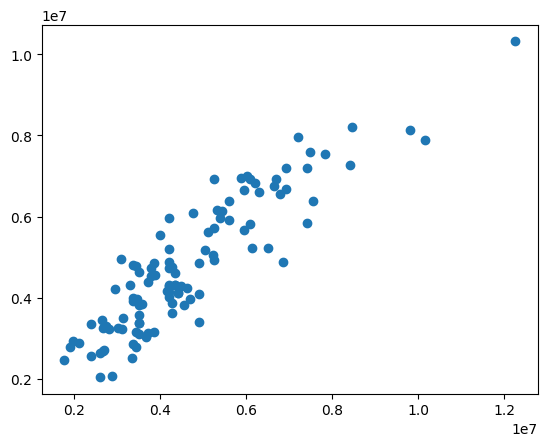

In [57]:
X_train, X_test,  y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=np.argmax(scores))

pipe_Rd.fit(X_train, y_train)

y_pred = pipe_Rd.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)

score = r2_score(y_test, y_pred)

print('Mean absolute error', mae)

print('Accuracy', score)

plt.scatter(y_test, y_pred)

### Lasso Regression

In [58]:
scores =[]
for i in range(1000):
    X_train, X_test,  y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=i)
    pipe_LS.fit(X_train, y_train)
    y_pred = pipe_LS.predict(X_test)
    scores.append(r2_score(y_test, y_pred))

In [59]:
np.argmax(scores)

497

In [60]:
scores[np.argmax(scores)]

0.8040312992346053

Mean absolute error 647597.1143128474
Accuracy 0.8040312992346053


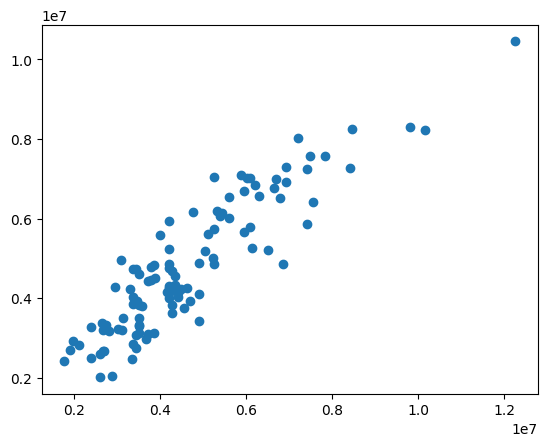

In [61]:
X_train, X_test,  y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=np.argmax(scores))

pipe_LS.fit(X_train, y_train)

y_pred = pipe_LS.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)

score = r2_score(y_test, y_pred)

print('Mean absolute error', mae)

print('Accuracy', score)

plt.scatter(y_test, y_pred)

### Elasticnet Regression

In [62]:
scores =[]
for i in range(1000):
    X_train, X_test,  y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=i)
    pipe_EN.fit(X_train, y_train)
    y_pred = pipe_EN.predict(X_test)
    scores.append(r2_score(y_test, y_pred))

In [63]:
np.argmax(scores)

329

In [64]:
scores[np.argmax(scores)]

0.49069535128817154

Mean absolute error 878193.3935816244
Accuracy 0.49069535128817154


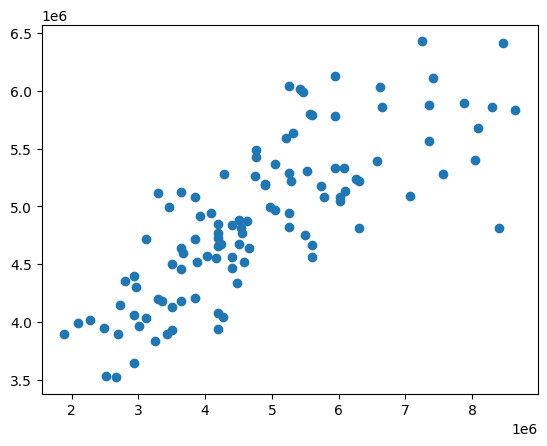

In [65]:
X_train, X_test,  y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=np.argmax(scores))

pipe_EN.fit(X_train, y_train)

y_pred = pipe_EN.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)

score = r2_score(y_test, y_pred)

print('Mean absolute error', mae)

print('Accuracy', score)

plt.scatter(y_test, y_pred)

In [66]:
#### Pickle the Machine leaning models, preprocessing model standardscaler

In [67]:
import pickle
pickle.dump(pipe_LSCV, open('LassoCVModel.pkl', 'wb'))

In [68]:
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [69]:
X_test

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
222,9166,2,1,1,yes,no,yes,no,yes,2,no,semi-furnished
57,9000,4,2,4,yes,yes,no,no,yes,1,yes,furnished
398,3120,3,1,2,yes,no,no,no,no,1,no,unfurnished
142,10500,4,2,2,yes,no,no,no,no,1,no,semi-furnished
36,7482,3,2,3,yes,no,no,yes,no,1,yes,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...
400,3512,2,1,1,yes,no,no,no,no,1,yes,unfurnished
302,2145,3,1,3,yes,no,no,no,no,1,yes,unfurnished
458,3850,3,1,2,yes,no,no,no,no,0,no,unfurnished
343,4080,2,1,1,yes,no,no,no,no,0,no,semi-furnished


In [71]:
f= pipe_LSCV.predict(pd.DataFrame([[15000,5,2,2,'yes','yes','yes','yes','yes',2,'yes','furnished']], columns=['area','bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea', 'furnishingstatus']))

In [73]:
f[0]

10800472.083181921

In [82]:
sorted(df['area'].unique())[0:10]

[1650, 1700, 1836, 1905, 1950, 2000, 2015, 2135, 2145, 2160]